# Pycaret

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
root_dir = '/content/drive/MyDrive/credit-now' if os.getcwd().split('/')[-1] != 'credit-now' else './'
os.chdir(root_dir)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import credit_data

## Installation

In [ ]:
# !pip install pycaret==2.3.10

In [ ]:
# pip install jinja2==3.1.2

In [ ]:
# pip install xgboost==1.6.0

## Pycaret Classification

In [ ]:
from pycaret.classification import *

train_data, train_label =  credit_data.load_data(name='train_cat', test_size=0, encoding=False)
train_data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,age,employed_year,work_phone,phone,email,occyp_type,family_size,begin_year,credit
0,1,1,0,1,1,247500.0,1,0,2,0,31.178082,4.219178,0,0,1,1,3,0.416667,1
1,2,0,1,1,0,450000.0,0,1,0,0,52.293151,12.147945,0,1,0,4,2,1.833333,2
2,3,1,0,1,0,202500.0,1,0,0,0,41.336986,5.731507,0,1,0,3,2,3.083333,0
3,4,1,1,1,0,157500.0,3,1,0,0,41.197260,5.767123,0,0,0,4,2,2.166667,2
4,5,1,0,1,2,270000.0,0,0,0,0,36.747945,13.687671,0,0,1,6,4,1.500000,1


In [ ]:
model = setup(data = train_data,
                target = 'credit',
                train_size = 0.7,
                session_id = 9)

,Description,Value
0,session_id,9
1,Target,credit
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(22724, 19)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


## Create Model

In [ ]:
xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7021,0.7020,0.4528,0.6865,0.6417,0.2746,0.3374
1,0.6996,0.7056,0.4495,0.6731,0.6391,0.2745,0.3296
2,0.6895,0.7023,0.4228,0.6279,0.6183,0.2362,0.2971
3,0.6882,0.7002,0.4287,0.6575,0.6192,0.2328,0.2939
4,0.6952,0.7088,0.4264,0.6534,0.6217,0.2432,0.3135
5,0.6970,0.6836,0.4434,0.6716,0.6339,0.2606,0.3224
6,0.6994,0.7045,0.4507,0.6818,0.6395,0.2700,0.3278
7,0.7157,0.7040,0.4709,0.7227,0.6588,0.3085,0.3764
8,0.6950,0.7082,0.4413,0.6764,0.6302,0.2514,0.3147


In [ ]:
top_3_models = compare_models(sort='Accuracy', n_select=3)
# Other options are 'AUC', 'Recall', 'Precision', 'F1', 'Kappa' and 'MCC'

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7064,0.7427,0.5029,0.6790,0.6723,0.3415,0.3654,2.102
xgboost,Extreme Gradient Boosting,0.6972,0.7015,0.4420,0.6716,0.6326,0.2592,0.3211,8.568
lightgbm,Light Gradient Boosting Machine,0.6951,0.6917,0.4219,0.6754,0.6170,0.2317,0.3141,0.670
ada,Ada Boost Classifier,0.6910,0.6306,0.4066,0.6333,0.6026,0.2045,0.3040,0.645
gbc,Gradient Boosting Classifier,0.6907,0.6548,0.4101,0.6607,0.6056,0.2099,0.3004,7.328
et,Extra Trees Classifier,0.6809,0.7174,0.5086,0.6548,0.6580,0.3143,0.3248,1.972
lda,Linear Discriminant Analysis,0.6423,0.6123,0.3392,0.5354,0.5107,0.0187,0.0640,0.172
ridge,Ridge Classifier,0.6403,0.0000,0.3351,0.5109,0.5033,0.0057,0.0295,0.036
lr,Logistic Regression,0.6400,0.5151,0.3333,0.4096,0.4995,0.0000,0.0000,0.542
nb,Naive Bayes,0.6400,0.5694,0.3333,0.4096,0.4995,0.0000,0.0000,0.038


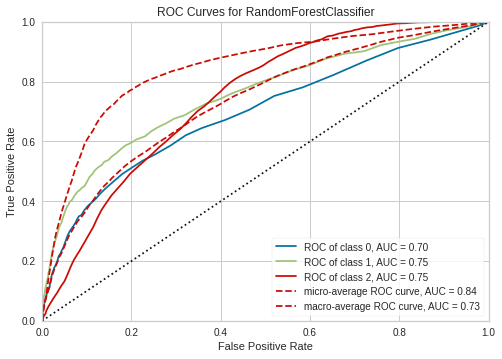

In [ ]:
model_top = top_3_models[0]
plot_model(model_top, plot = 'auc')

In [ ]:
predict_model(top_3_models[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7077,0.7416,0.5089,0.6802,0.674,0.352,0.3755


,index,income_total,age,employed_year,begin_year,gender_0,car_0,reality_0,child_num_0,child_num_1,...,occyp_type_9,family_size_1,family_size_2,family_size_3,family_size_4,family_size_5,family_size_6,credit,Label,Score
0,20880.0,216000.0,49.142467,8.367124,3.333333,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.70
1,14282.0,360000.0,57.528767,8.032877,1.250000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,0.73
2,552.0,135000.0,25.901369,2.800000,2.250000,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1,0.70
3,1671.0,225000.0,56.682190,0.000000,0.916667,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.71
4,19961.0,234000.0,29.098631,5.290411,3.833333,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,15815.0,126000.0,65.517807,0.000000,0.666667,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,2,0.59
6814,7793.0,67500.0,48.282192,25.369864,1.083333,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.66
6815,24484.0,108000.0,58.838356,0.000000,0.750000,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.82
6816,20136.0,189000.0,59.849316,0.000000,0.583333,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.75


## Blending

In [ ]:
blended = blend_models(estimator_list=top_3_models, fold=10, optimize='Accuracy', method='hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7071,0.0,0.4520,0.7018,0.6432,0.2801,0.3523
1,0.7008,0.0,0.4454,0.6804,0.6366,0.2687,0.3326
2,0.6989,0.0,0.4271,0.6649,0.6232,0.2474,0.3259
3,0.6933,0.0,0.4324,0.6853,0.6230,0.2382,0.3087
4,0.6983,0.0,0.4308,0.6709,0.6259,0.2499,0.3240
5,0.7014,0.0,0.4468,0.6901,0.6372,0.2672,0.3347
6,0.7044,0.0,0.4471,0.6889,0.6399,0.2734,0.3424
7,0.7164,0.0,0.4634,0.7317,0.6546,0.3023,0.3793
8,0.6975,0.0,0.4364,0.6925,0.6278,0.2482,0.3213


In [ ]:
predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7009,0,0.4456,0.6883,0.6333,0.2694,0.3412


,index,income_total,age,employed_year,begin_year,gender_0,car_0,reality_0,child_num_0,child_num_1,...,occyp_type_8,occyp_type_9,family_size_1,family_size_2,family_size_3,family_size_4,family_size_5,family_size_6,credit,Label
0,20880.0,216000.0,49.142467,8.367124,3.333333,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2
1,14282.0,360000.0,57.528767,8.032877,1.250000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2
2,552.0,135000.0,25.901369,2.800000,2.250000,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1
3,1671.0,225000.0,56.682190,0.000000,0.916667,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2
4,19961.0,234000.0,29.098631,5.290411,3.833333,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,15815.0,126000.0,65.517807,0.000000,0.666667,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,2
6814,7793.0,67500.0,48.282192,25.369864,1.083333,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2
6815,24484.0,108000.0,58.838356,0.000000,0.750000,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2
6816,20136.0,189000.0,59.849316,0.000000,0.583333,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2


In [ ]:
final_blended = finalize_model(blended)
print(final_blended)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [ ]:
predict_model(final_blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7713,0,0.5656,0.8142,0.7347,0.4627,0.5377


,index,income_total,age,employed_year,begin_year,gender_0,car_0,reality_0,child_num_0,child_num_1,...,occyp_type_8,occyp_type_9,family_size_1,family_size_2,family_size_3,family_size_4,family_size_5,family_size_6,credit,Label
0,20880.0,216000.0,49.142467,8.367124,3.333333,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1
1,14282.0,360000.0,57.528767,8.032877,1.250000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2
2,552.0,135000.0,25.901369,2.800000,2.250000,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2
3,1671.0,225000.0,56.682190,0.000000,0.916667,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
4,19961.0,234000.0,29.098631,5.290411,3.833333,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,15815.0,126000.0,65.517807,0.000000,0.666667,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,2
6814,7793.0,67500.0,48.282192,25.369864,1.083333,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2
6815,24484.0,108000.0,58.838356,0.000000,0.750000,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2
6816,20136.0,189000.0,59.849316,0.000000,0.583333,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2


In [ ]:
train_df = pd.read_csv('credit_data/train_old.csv')
holdout_data = train_df.sample(frac=0.10, random_state=0).reset_index(drop=True)

unseen_predictions = predict_model(final_blended, data=holdout_data)
unseen_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7667,0,0.5571,0.814,0.7279,0.4466,0.527


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,age,employed_year,work_phone,phone,email,occyp_type,family_size,begin_year,credit,Label
0,17051,1,0,1,1,112500.0,0,1,0,0,29.673973,3.460274,0,0,0,1,3,2.250000,2,2
1,179,0,1,1,0,315000.0,1,0,0,3,46.547945,5.550685,0,0,0,5,2,1.583333,2,2
2,14608,0,1,1,0,270000.0,0,0,0,0,30.816438,6.550685,0,0,0,5,2,4.166667,1,2
3,12723,1,0,1,0,157500.0,2,0,0,0,59.136986,0.000000,0,1,0,0,2,4.416667,2,2
4,14754,0,1,1,1,189000.0,0,1,0,0,36.484932,10.035616,0,0,0,6,3,4.083333,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,2440,0,0,1,1,292500.0,1,0,2,0,40.506849,8.268493,1,1,0,1,3,1.166667,1,2
2268,12708,1,0,0,0,225000.0,2,1,0,0,61.761644,0.000000,0,0,0,0,2,3.333333,2,2
2269,14382,1,1,1,0,135000.0,2,0,4,0,60.224658,0.000000,0,0,0,0,1,0.833333,2,2
2270,11100,1,0,1,0,90000.0,2,0,2,0,54.882192,0.000000,0,0,0,0,2,3.250000,1,2


## Save & Load

In [ ]:
save_model(final_blended, 'final_blended')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='credit',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                                               learning_rate=0.1,
                                                               max_depth=-1,
                                                               min_child_samples=20,
                              

In [ ]:
from google.colab import files
files.download('final_blended.pkl')

In [ ]:
loaded_model = load_model('final_blended')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
unseen_predictions = predict_model(loaded_model, data=holdout_data)
unseen_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7667,0,0.5571,0.814,0.7279,0.4466,0.527


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,age,employed_year,work_phone,phone,email,occyp_type,family_size,begin_year,credit,Label
0,17051,1,0,1,1,112500.0,0,1,0,0,29.673973,3.460274,0,0,0,1,3,2.250000,2,2
1,179,0,1,1,0,315000.0,1,0,0,3,46.547945,5.550685,0,0,0,5,2,1.583333,2,2
2,14608,0,1,1,0,270000.0,0,0,0,0,30.816438,6.550685,0,0,0,5,2,4.166667,1,2
3,12723,1,0,1,0,157500.0,2,0,0,0,59.136986,0.000000,0,1,0,0,2,4.416667,2,2
4,14754,0,1,1,1,189000.0,0,1,0,0,36.484932,10.035616,0,0,0,6,3,4.083333,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,2440,0,0,1,1,292500.0,1,0,2,0,40.506849,8.268493,1,1,0,1,3,1.166667,1,2
2268,12708,1,0,0,0,225000.0,2,1,0,0,61.761644,0.000000,0,0,0,0,2,3.333333,2,2
2269,14382,1,1,1,0,135000.0,2,0,4,0,60.224658,0.000000,0,0,0,0,1,0.833333,2,2
2270,11100,1,0,1,0,90000.0,2,0,2,0,54.882192,0.000000,0,0,0,0,2,3.250000,1,2


## LogLoss

In [ ]:
add_metric('logloss', 'LogLoss', log_loss, greater_is_better = False, target = 'pred_proba')

Name                                                           LogLoss
Display Name                                                   LogLoss
Score Function                   <function log_loss at 0x7f1fbc8aed40>
Scorer               make_scorer(log_loss, greater_is_better=False,...
Target                                                      pred_proba
Args                                                                {}
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: logloss, dtype: object

In [ ]:
# svm, ridge는 predict_proba 미지원으로 제외
top_5_models = compare_models(sort = 'logloss',
                            n_select = 3,
                            exclude = ['svm', 'ridge'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss,TT (Sec)
xgboost,Extreme Gradient Boosting,0.6972,0.7015,0.4420,0.6716,0.6326,0.2592,0.3211,0.7724,8.783
lightgbm,Light Gradient Boosting Machine,0.6951,0.6917,0.4219,0.6754,0.6170,0.2317,0.3141,0.7753,0.540
rf,Random Forest Classifier,0.7064,0.7427,0.5029,0.6790,0.6723,0.3415,0.3654,0.7916,2.078
gbc,Gradient Boosting Classifier,0.6907,0.6548,0.4101,0.6607,0.6056,0.2099,0.3004,0.7949,7.347
lda,Linear Discriminant Analysis,0.6423,0.6123,0.3392,0.5354,0.5107,0.0187,0.0640,0.8631,0.170
dummy,Dummy Classifier,0.6400,0.5000,0.3333,0.4096,0.4995,0.0000,0.0000,0.8832,0.027
nb,Naive Bayes,0.6400,0.5694,0.3333,0.4096,0.4995,0.0000,0.0000,0.8838,0.041
lr,Logistic Regression,0.6400,0.5151,0.3333,0.4096,0.4995,0.0000,0.0000,0.9023,0.294
ada,Ada Boost Classifier,0.6910,0.6306,0.4066,0.6333,0.6026,0.2045,0.3040,1.0807,0.643
et,Extra Trees Classifier,0.6809,0.7174,0.5086,0.6548,0.6580,0.3143,0.3248,1.0907,2.253


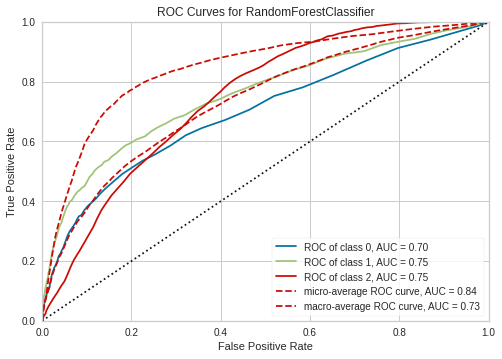

In [ ]:
model_top = top_3_models[0]
plot_model(model_top, plot = 'auc')

In [ ]:
predict_model(top_3_models[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,Random Forest Classifier,0.7077,0.7416,0.5089,0.6802,0.674,0.352,0.3755,0.8258


,index,income_total,age,employed_year,begin_year,gender_0,car_0,reality_0,child_num_0,child_num_1,...,occyp_type_9,family_size_1,family_size_2,family_size_3,family_size_4,family_size_5,family_size_6,credit,Label,Score
0,20880.0,216000.0,49.142467,8.367124,3.333333,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.70
1,14282.0,360000.0,57.528767,8.032877,1.250000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,0.73
2,552.0,135000.0,25.901369,2.800000,2.250000,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1,0.70
3,1671.0,225000.0,56.682190,0.000000,0.916667,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.71
4,19961.0,234000.0,29.098631,5.290411,3.833333,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,15815.0,126000.0,65.517807,0.000000,0.666667,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,2,0.59
6814,7793.0,67500.0,48.282192,25.369864,1.083333,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.66
6815,24484.0,108000.0,58.838356,0.000000,0.750000,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.82
6816,20136.0,189000.0,59.849316,0.000000,0.583333,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.75


## Blend after LogLoss

In [ ]:
blended = blend_models(estimator_list=top_3_models, 
                        fold=10,
                        optimize='Accuracy',
                        method = 'hard')

In [ ]:
final_blended = finalize_model(blended)
print(final_blended)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [ ]:
top_5_models

[XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=100,
               n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
               predictor='auto', random_state=9, reg_alpha=0, ...),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs

In [ ]:
evaluate_model(top_5_models[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

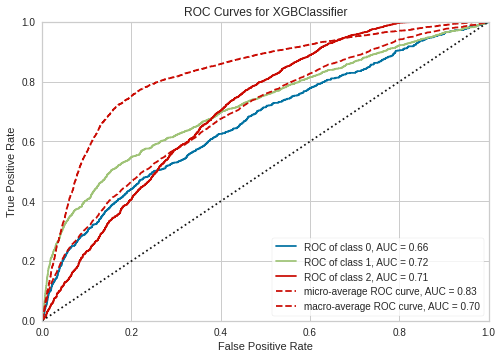

In [ ]:
model_top = top_5_models[0]
plot_model(model_top, plot = 'auc')

In [ ]:
predict_model(top_5_models[0]) # 미리 제외시켜두었던 test data에 대한 예측 결과값

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,Extreme Gradient Boosting,0.6942,0.7049,0.4435,0.6669,0.6296,0.2616,0.321,0.7805


,index,income_total,age,employed_year,begin_year,gender_0,car_0,reality_0,child_num_0,child_num_1,...,occyp_type_9,family_size_1,family_size_2,family_size_3,family_size_4,family_size_5,family_size_6,credit,Label,Score
0,20880.0,216000.0,49.142467,8.367124,3.333333,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2,0.4707
1,14282.0,360000.0,57.528767,8.032877,1.250000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,0.7889
2,552.0,135000.0,25.901369,2.800000,2.250000,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,0.5636
3,1671.0,225000.0,56.682190,0.000000,0.916667,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2,0.4777
4,19961.0,234000.0,29.098631,5.290411,3.833333,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.8126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,15815.0,126000.0,65.517807,0.000000,0.666667,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,2,0.5379
6814,7793.0,67500.0,48.282192,25.369864,1.083333,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.8458
6815,24484.0,108000.0,58.838356,0.000000,0.750000,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.7183
6816,20136.0,189000.0,59.849316,0.000000,0.583333,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.5912
